##Lab 3 Notebook 

Author: Kyle Sprague 
Date: 08/03/2022 

**Lab Description**

For this lab we aim to deduce the speed of sound in air and helium using a fomalism that involves the frequency of the sound being pumped into a glass box $f$, the number of nodes present at that frequency observed by looking at fluctuations on the oscilloscope ($n_x$, $n_y$, and $n_z$), and the dimensions of the given box ($L_x$, $L_y$, and $L_z$). 

**Original Spreadsheet data before tidying** 

Air: 

https://docs.google.com/spreadsheets/d/1-_NvTU92_MhKJJPqZbhFz19i4aQkK45OZlKaBoS-CJc/edit#gid=0 <br> 

Helium: 
https://docs.google.com/spreadsheets/d/1UQM-DJcxYgtwO0KrsIf8CFsE4TCdun_7WpWxZut35Ek/edit#gid=0 


Tidy data: 

Air: 

https://docs.google.com/spreadsheets/d/1hmsDI0HwQNObTFKdH4I_aBgjr6i4jxQ_OgIkEz2Fj8s/edit#gid=0

Helium: 

https://docs.google.com/spreadsheets/d/1zaQZWgrPRME4n9aiEPB0A37dT2wVzDF6GyWfKdJGcyM/edit#gid=0


**How the tidy data sheets are broken up (relative to boxes)**


<center>
Air:

| Box | Rows |  
| : --- | : --- | 
| 7 | 2-5 | 
| 2 | 6-9 | 
| 1 | 10 - 13| 
| 4 | 14 - 17|

Helium: 

| Box | Rows |  
| : --- | : --- | 
| 3 | 2 | 
| 5 | 3-6 | 
| 4 | 7 - 10| 

</center>






###Importing Relevant Libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import glob
import matplotlib.ticker as mtick
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Loading in the data

In [2]:


all_files= glob.glob("/content/drive/MyDrive/Sprague | 231/L_3/*csv")  
helium = pd.read_csv([file for file in all_files if "helium" in file][0]) #get a list containing the helium file path, 
#take the only element in that list, then convert to str
air = pd.read_csv([file for file in all_files if "air" in file][0]) 
#adjusting the df for our needs 
display(air)

,frequency_(kHz),l_x_(mm),l_x_(cm),l_y_(mm),l_z_(cm),n_x,n_y,n_z,start_frequency_(kHz),end_frequency_(kHz)
0,2.165,135.12,NaN,98.79,2.0,1,1,0,1.869,2.381
1,3.082,135.12,NaN,98.79,2.0,2,1,0,2.801,3.300
2,3.484,135.12,NaN,98.79,2.0,0,2,0,3.300,3.552
3,1.745,135.12,NaN,98.79,2.0,0,1,0,1.425,1.859
4,1.582,119.16,NaN,109.42,2.4,0,1,0,1.506,1.773
5,2.146,119.16,NaN,109.42,2.4,1,1,0,1.773,2.478
6,2.899,119.16,NaN,109.42,2.4,2,0,0,2.421,2.985
7,3.289,119.16,NaN,109.42,2.4,2,1,0,3.195,3.417
8,1.475,164.00,16.4,117.62,2.6,0,1,0,1.175,1.565
9,1.808,164.00,16.4,117.62,2.6,1,1,0,1.560,1.970


###Calculating the speed of sound 

To arrive at a value for the speed of sound we make use of the fact that within air and helium media, standing waves arise when sound induce pressure fluctuations. A single standing wave mode is characterized by a wavelength: 

$$ 
\lambda_n = \frac{2L}{n}, n = 1,2,...
$$

where L is the string length, n represents the number of antinodes, and $\lambda$ is wavelength. The prelab tells us that the wave propagation number for a standing wave is given by 

$$ k = \frac{n}{\pi L}$$, which in three dimensions, becomes: 

$$ k = \sqrt{(k_x^2 + k_y^2 + k_z^2)}. $$

Each k is given by 

$$k = \frac{n_i \pi}{L_i}$$  

where i corresponds to the x, y, or z directions. The number of antinodes in of displacement (given by the number of nodes of pressure) will correspond to an integer value because they are quantized along the string. At higher frequencies we expect a larger number of pressure nodes and thus a higher number of antinodes. 

The speed of sound is obtained using the relation 

$$f = \frac{v}{\lambda}$$

and rearraging it to obtain 

$$v = f \lambda $$

$$= \frac{2 \pi f}{\sqrt{(k_x^2 + k_y^2 + k_z^2)}} $$ 

$$= \frac{2 \pi f}{\pi \sqrt{(\frac{n_x}{L_x})^2 + (\frac{n_y}{L_y})^2 + (\frac{n_z}{L_z})^2)}} $$  

$$ c_s = \frac{2 f}{\sqrt{(\frac{n_x}{L_x})^2 + (\frac{n_y}{L_y})^2 + (\frac{n_z}{L_z})^2)}}
$$

In the below cell we implement a function to perform a calculation for $v$:


In [3]:

def speed_of_sound_calculator(df: "Pandas.DataFrame") -> int: 
  '''
    Function that returns a copy of the existing DataFrame row with a new v_s in m_s column. 
    To be wrapped by an apply function such that the DataFrame rows are iterated over. 

    Parameters: A series object corresponding to a given row of a particular data frame 

    Returns: integer corresponding to a speed of sound calculation 
  '''
  #print(df)
  numerator = 2 * (df["frequency_(kHz)"] * 1000) #converting to Hz 
  denominator_first_elem = (df["n_x"] / (df["l_x_(mm)"] / 1000))**2 #converting to m
  denominator_second_elem = (df["n_y"] / (df["l_y_(mm)"] / 1000))**2  #converting to m
  denominator_third_elem = (df["n_z"] / (df["l_z_(cm)"] / 100))**2  #converting to m
  if denominator_first_elem != 0 or denominator_second_elem != 0 or denominator_third_elem != 0:
    return numerator / np.sqrt(denominator_first_elem + denominator_second_elem + denominator_third_elem)
  else:
    denominator_alt_elem = 1 / ((df["l_z_(cm)"] / 100)**2) #converting to one and using mode in z direction
    #to account for unavailable modes in the other directions
    return numerator / np.sqrt(denominator_first_elem + denominator_second_elem + denominator_alt_elem) 

In [4]:
if "v_m/s" not in air.columns:
  air.insert(10, "v_m/s", air.apply(speed_of_sound_calculator, axis = 1))  
if "v_m/s" not in helium.columns:
  helium.insert(10, "v_m/s", helium.apply(speed_of_sound_calculator, axis = 1)) 

In [5]:

display(helium)
display(air)

,frequency_(kHz),l_x_(mm),l_x_(cm),l_y_(mm),l_z_(cm),n_x,n_y,n_z,start_frequency_(kHz),end_frequency_(kHz),v_m/s
0,3.073,164.00,16.4,118.49,7.4,1,0,0,2.654,3.351,1007.944000
1,5.051,136.27,NaN,99.12,6.7,0,1,0,4.496,5.435,1001.310240
2,6.266,136.27,NaN,99.12,6.7,1,1,0,5.411,6.631,1004.538183
3,7.463,136.27,NaN,99.12,6.7,0,0,1,6.658,7.849,1000.042000
4,9.728,136.27,NaN,99.12,6.7,1,1,0,8.918,9.728,1559.551141
5,5.000,134.40,NaN,66.85,9.9,0,0,1,4.444,5.198,990.000000
6,6.234,134.40,NaN,66.85,9.9,1,0,0,5.600,6.649,1675.699200
7,7.310,134.40,NaN,66.85,9.9,2,0,0,6.757,7.342,982.464000
8,8.264,134.40,NaN,66.85,9.9,1,1,0,7.874,8.562,989.278090


,frequency_(kHz),l_x_(mm),l_x_(cm),l_y_(mm),l_z_(cm),n_x,n_y,n_z,start_frequency_(kHz),end_frequency_(kHz),v_m/s
0,2.165,135.12,NaN,98.79,2.0,1,1,0,1.869,2.381,345.311184
1,3.082,135.12,NaN,98.79,2.0,2,1,0,2.801,3.300,343.744584
2,3.484,135.12,NaN,98.79,2.0,0,2,0,3.300,3.552,344.184360
3,1.745,135.12,NaN,98.79,2.0,0,1,0,1.425,1.859,344.777100
4,1.582,119.16,NaN,109.42,2.4,0,1,0,1.506,1.773,346.204880
5,2.146,119.16,NaN,109.42,2.4,1,1,0,1.773,2.478,345.915302
6,2.899,119.16,NaN,109.42,2.4,2,0,0,2.421,2.985,345.444840
7,3.289,119.16,NaN,109.42,2.4,2,1,0,3.195,3.417,344.199365
8,1.475,164.00,16.4,117.62,2.6,0,1,0,1.175,1.565,346.979000
9,1.808,164.00,16.4,117.62,2.6,1,1,0,1.560,1.970,345.615940


##Uncertainty Propagation

Note that in the equation for the speed of sound equation: 

$$ c_s = \frac{2 f}{\sqrt{(\frac{n_x}{L_x})^2 + (\frac{n_y}{L_y})^2 + (\frac{n_z}{L_z})^2)}}
$$ 

we have uncertainty assoicated with $f$, $L_x$, $L_y$, and $L_z$. The uncertainty in $L_z$ is always the uncertainty associated with the ruler $\sigma_{L_z} = 0.0005 m = 5 *10^{-4} m$ and the uncertainty for $L_x$ and $L_y$ typically corresponds to the uncertainty associated with the calipers $\sigma_{L_y} = 0.000002m = 2.0*10^{-5} m$. However, sometimes the measurement in the x direction has to be performed with the ruler and thus the uncertainty in the x length measurement corresponds to the measurement precision of the ruler.  

Due to the form of our equation, we can propogate error by first calculating error associated with each $(\frac{n_i}{L_i})^2$ term in the denominator where i = x, y, or z. For each term, the error calculation will take the form

$$f = (\frac{n_i}{L_i}^2)$$ 

$$\sigma_j = \sqrt{ \left( \frac{\partial{f}}{\partial{n_i}} \right)^2 \sigma_{n_i}^2 + \left( \frac{\partial{f}}{\partial{L_i}} \right)^2 \sigma_{L_i}^2}$$  

where j = 1, 2, or 3 corresponding to the first, second, and third denominator terms. This can be reduced to

$$\sigma_j = \sqrt{0 + \left( \frac{-2 n_i^2}{L_i^3} \right)^2 \sigma_{L_i}^2}.$$

because $\sigma_{n_i} = 0$. The total denom uncertainty is then 

$$\sigma_{denom} = \sqrt{\sigma_1 + \sigma_2 + \sigma_3},$$ 

Now that we have our denominator uncertainty, we look at the numerator of 

$$ v = \frac{2 f}{\sqrt{(\frac{n_x}{L_x})^2 + (\frac{n_y}{L_y})^2 + (\frac{n_z}{L_z})^2)}}.
$$ 

A conservative estimate of the peak spread (greater than one standard deviation), is given by 

$$\sigma_f = \frac{end frequency - start frequency}{2}. $$ 

Now that we have the uncertainty in the frequency, we can calculate $\sigma_v$, the uncertainty in the speed of sound for a given medium, using 

$$g = 2fd^{-1}$$ 

where d is the full value of the denominator such that 

$$\sigma_v = \sqrt{ \left( \frac{\partial{g}}{\partial{f}} \right)^2 \sigma_{f}^2 + \left( \frac{\partial{g}}{\partial{d}} \right)^2 \sigma_{d}^2}$$  

$$ = \sqrt{ \left( \frac{2}{d} \right)^2 \sigma_{f}^2 + \left( \frac{-2f}{d^2} \right)^2 \sigma_{d}^2 }$$. 

The value of $\sigma_v$ is obtained for each frequency for each box. 


##Uncertainty Propagation!

In [6]:

#beginning with uncertainty for (nx/Lx)^2, (ny/Ly)^2, and (nz/Lz)^2

#if both columns l_x_(mm), l_x_(cm), and l_x_(mm) contain values, then we need to use the ruler 
#uncertainty 

#the l_z_(cm) column will always have the ruler uncertainty applied (0.5 cm = 0.5 mm = 0.0005 m)

#the l_y_(mm) column will always have the calipers uncertainty (0.02 mm = 2e-5 m)

def uncertainty_in_denom(df: "Pandas.DataFrame") -> int:  
  ''' 
    Function that takes in a data frame and computes uncertainty associated 
    with the denominator of the speed of sound formalism. 

    Parameters: 
    
    Pandas.DataFrame -- df: a DataFrame object corresponding to helium or air elements 

    Returns: 
      integer value for denominator uncertainty

  '''

  
  freq = df["frequency_(kHz)"].to_numpy() 
  l_x_mm = df["l_x_(mm)"].to_numpy() / 1000 #x length column from data frame converted to m (from calipers)
  l_x_cm = df["l_x_(cm)"].to_numpy()  /100 #x lenght column from data frame converted to m (from ruler) 
  l_y_mm = df["l_y_(mm)"].to_numpy()/1000  #x length column from data frame converted to m (from calipers)
  l_z_cm = df["l_z_(cm)"].to_numpy() /100 #z length column from data frame converted to m (from ruler)
  n_x = df["n_x"].to_numpy() #nodes in the x direction
  n_y = df["n_y"].to_numpy() #nodes in the y_direction
  n_z = df["n_z"].to_numpy() #nodes in the z_direction 
  #print(freq)
  calipers_uncertainty = 2e-5 #m
  ruler_uncertainty = 0.0005 #m
  
  list_of_denom_uncertainties = []

  for i in range(len(freq)):  
    second_denom_component_uncertainty = np.sqrt((((-2 *(n_y[i])**2)/(l_y_mm[i]**3)**2) *(calipers_uncertainty))**2) #referring to sigma 2 in our denom uncertainty equation
    print(f"second denom_component_uncertainty (caliper uncert. case) is {second_denom_component_uncertainty}")
    third_denom_component_uncertainty = np.sqrt((((-2 *(n_z[i])**2)/(l_z_cm[i]**3)**2) *(ruler_uncertainty))**2) #referring to signma 3 in our denom uncertainty equation
    print(f"third denom_component_uncertainty (caliper uncert. case) is {third_denom_component_uncertainty}")
    if np.isnan(l_x_cm[i]) == True:   
      first_denom_component_uncertainty = np.sqrt((((-2 *(n_x[i])**2)/(l_x_mm[i]**3)**2) *(calipers_uncertainty))**2)
      print(f"first denom_component_uncertainty (caliper uncert. case) is {first_denom_component_uncertainty}")
    else: 
      first_denom_component_uncertainty = np.sqrt((((-2 *(n_x[i])**2)/(l_x_cm[i]**3)**2) *(ruler_uncertainty))**2)
      print(f"first denom_component_uncertainty (ruler uncert. case) is {first_denom_component_uncertainty}")
    
    list_of_denom_uncertainties.append(np.sqrt(first_denom_component_uncertainty + second_denom_component_uncertainty 
                                               + third_denom_component_uncertainty))

  df.insert(len(df.columns)-1, "denom_uncertainty", np.array(list_of_denom_uncertainties))

  return df
  
  #return df
  #END FIX THIS STUFF!!! 

air_w_denom_uncertainty = uncertainty_in_denom(air) 
helium_w_denom_uncertainty = uncertainty_in_denom(helium)



second denom_component_uncertainty (caliper uncert. case) is 43.03106340723373
third denom_component_uncertainty (caliper uncert. case) is 0.0
first denom_component_uncertainty (caliper uncert. case) is 6.572675208250041
second denom_component_uncertainty (caliper uncert. case) is 43.03106340723373
third denom_component_uncertainty (caliper uncert. case) is 0.0
first denom_component_uncertainty (caliper uncert. case) is 26.290700833000162
second denom_component_uncertainty (caliper uncert. case) is 172.12425362893492
third denom_component_uncertainty (caliper uncert. case) is 0.0
first denom_component_uncertainty (caliper uncert. case) is 0.0
second denom_component_uncertainty (caliper uncert. case) is 43.03106340723373
third denom_component_uncertainty (caliper uncert. case) is 0.0
first denom_component_uncertainty (caliper uncert. case) is 0.0
second denom_component_uncertainty (caliper uncert. case) is 23.30664325627926
third denom_component_uncertainty (caliper uncert. case) is 0.0

In [7]:
display(helium_w_denom_uncertainty) 
display(air_w_denom_uncertainty)

,frequency_(kHz),l_x_(mm),l_x_(cm),l_y_(mm),l_z_(cm),n_x,n_y,n_z,start_frequency_(kHz),end_frequency_(kHz),denom_uncertainty,v_m/s
0,3.073,164.00,16.4,118.49,7.4,1,0,0,2.654,3.351,7.169163,1007.944000
1,5.051,136.27,NaN,99.12,6.7,0,1,0,4.496,5.435,6.494506,1001.310240
2,6.266,136.27,NaN,99.12,6.7,1,1,0,5.411,6.631,6.958837,1004.538183
3,7.463,136.27,NaN,99.12,6.7,0,0,1,6.658,7.849,105.141845,1000.042000
4,9.728,136.27,NaN,99.12,6.7,1,1,0,8.918,9.728,6.958837,1559.551141
5,5.000,134.40,NaN,66.85,9.9,0,0,1,4.444,5.198,32.590755,990.000000
6,6.234,134.40,NaN,66.85,9.9,1,0,0,5.600,6.649,2.605147,1675.699200
7,7.310,134.40,NaN,66.85,9.9,2,0,0,6.757,7.342,5.210293,982.464000
8,8.264,134.40,NaN,66.85,9.9,1,1,0,7.874,8.562,21.329928,989.278090


,frequency_(kHz),l_x_(mm),l_x_(cm),l_y_(mm),l_z_(cm),n_x,n_y,n_z,start_frequency_(kHz),end_frequency_(kHz),denom_uncertainty,v_m/s
0,2.165,135.12,NaN,98.79,2.0,1,1,0,1.869,2.381,7.042992,345.311184
1,3.082,135.12,NaN,98.79,2.0,2,1,0,2.801,3.300,8.325969,343.744584
2,3.484,135.12,NaN,98.79,2.0,0,2,0,3.300,3.552,13.119613,344.184360
3,1.745,135.12,NaN,98.79,2.0,0,1,0,1.425,1.859,6.559807,344.777100
4,1.582,119.16,NaN,109.42,2.4,0,1,0,1.506,1.773,4.827695,346.204880
5,2.146,119.16,NaN,109.42,2.4,1,1,0,1.773,2.478,6.105673,345.915302
6,2.899,119.16,NaN,109.42,2.4,2,0,0,2.421,2.985,7.475986,345.444840
7,3.289,119.16,NaN,109.42,2.4,2,1,0,3.195,3.417,8.899271,344.199365
8,1.475,164.00,16.4,117.62,2.6,0,1,0,1.175,1.565,3.886749,346.979000
9,1.808,164.00,16.4,117.62,2.6,1,1,0,1.560,1.970,8.154981,345.615940


In [11]:
#total uncertainty 

def calculate_total_uncertainty(df: "Pandas.DataFrame") -> "np.ndarray":  
  ''' 
    Function that calculates the total uncertainty in the speed of sound 
    using the uncertainty in f, a denominator calculation, uncertainty and 
    uncertainty in the denominator 

    df -- Pandas.DataFrame: A data frame object including denominator uncertainty 

    Returns:
      Array of uncertainty values with each uncertainty value corresponding 
      to a given resonant frequency for a given box
  '''

  l_x_mm = df["l_x_(mm)"].to_numpy() / 1000 #x length column from data frame converted to m (from calipers)
  l_x_cm = df["l_x_(cm)"].to_numpy()  /100 #x lenght column from data frame converted to m (from ruler) 
  l_y_mm = df["l_y_(mm)"].to_numpy()/1000  #x length column from data frame converted to m (from calipers)
  l_z_cm = df["l_z_(cm)"].to_numpy() /100 #z length column from data frame converted to m (from ruler)
  n_x = df["n_x"].to_numpy() #nodes in the x direction
  n_y = df["n_y"].to_numpy() #nodes in the y_direction
  n_z = df["n_z"].to_numpy() #nodes in the z_direction 
  f = df["frequency_(kHz)"].to_numpy()*1000 #conversion to Hz
  max_frequencies = df["end_frequency_(kHz)"].to_numpy()*1000 #conversion to Hz
  min_frequencies = df["start_frequency_(kHz)"].to_numpy()*1000 #conversion to Hz

  l_x_composite_list = [] 
  for i in range(len(l_x_mm)): 
    if np.isnan(l_x_cm[i]) != True: 
      l_x_composite_list.append(l_x_cm[i])
    elif np.isnan(l_x_cm[i]) == True:
      l_x_composite_list.append(l_x_mm[i]) 
  
  l_x_composite_array = np.array(l_x_composite_list) 
  
  denominator_values = []
  for j in range(len(l_x_cm)): 
    first_component  = (n_x[i]/l_x_composite_list[i])**2
    second_component = (n_y[i]/l_y_mm[i])**2
    third_component = (n_z[i]/l_z_cm[i])**2 
    full_denom = np.sqrt(first_component + second_component + third_component)
    denominator_values.append(full_denom) 

  denominator_values_array = np.array(denominator_values) 

  denom_sigma = df["denom_uncertainty"].to_numpy() 
  frequency_sigma = (max_frequencies - min_frequencies) / 2

  sigma_v_total = [] 
  sigma_one_total = [] 
  sigma_two_total = []
  for k in range(len(f)): 
    first_sigma_component = ((2/denominator_values_array[k])**2) * (frequency_sigma[k]**2) 
    sigma_one_total.append(first_sigma_component)
    second_sigma_component = ((-2*f[i]/(denominator_values_array[k]**2))**2) * (denom_sigma[k]**2)   
    sigma_two_total.append(second_sigma_component) 
    sigma_v_total.append(np.sqrt(first_sigma_component+second_sigma_component))

  sigma_v_array = np.array(sigma_v_total)  
  
  print(sigma_one_total) 
  print(sigma_two_total)
  result = sigma_one_total > sigma_two_total 
  #print(f"more predominant uncertainty term is given by {result}")

  return sigma_v_array

sigma_v_air = calculate_total_uncertainty(air_w_denom_uncertainty)  
print(sigma_v_air)
sigma_v_helium = calculate_total_uncertainty(helium_w_denom_uncertainty)  
print(sigma_v_helium)

[939.1524482443826, 892.0665693866712, 227.5083048756076, 674.8008672390706, 255.39870789678113, 1780.632955889375, 1139.6050917691998, 176.56398490629635, 544.9107642287087, 602.2320806498745, 364.5671550208917, 788.028380082255, 213.29261840315843, 558.972399663276, 202.9317904600327, 280.87445046371306]
[20903.355199282487, 29212.666250567767, 72534.33939541623, 18133.584848854058, 9821.579100428773, 15709.72569743859, 23552.586388039268, 33374.16548846803, 6366.115752288265, 28025.120760819074, 86636.02003412327, 93002.13578641154, 2859.9995778956345, 0.0, 11439.998311582538, 191725.70789240458]
[147.79210956 173.50715495 269.74404108 137.14366816 100.38415118
 132.25111967 157.13749228 183.16858211  83.13258396 169.1961963
 294.95861945 306.25179863  55.43728165  23.64259714 107.90241008
 438.18555698]
[1740.4507130781376, 3158.838027261678, 5332.315460078961, 5081.824889900742, 2350.5322314954356, 2036.7553454059732, 3942.2771194479633, 1226.0492195145944, 1695.793825003773]
[180

[0.0004265521160361964, array([0.00038864, 0.00041847, 0.00622616, 0.0004149 ]), array([0.00193032, 0.00016655, 0.0003105 , 0.00126368])]


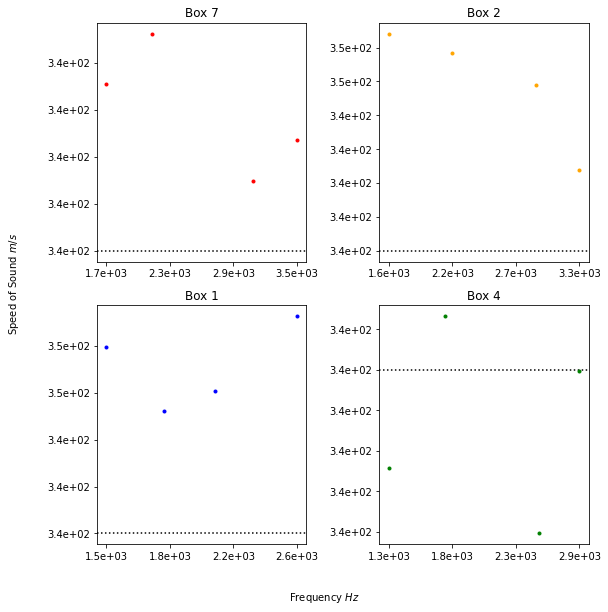

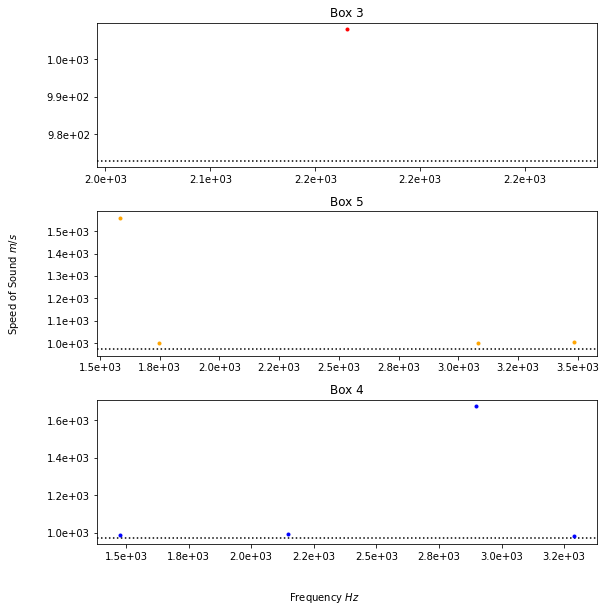

In [9]:
##Plotting 1: 
#speed of sound vs frequency w/error for each box 

def v_vs_f_plotter_func(speed_of_sound: "np.ndarray", frequency: "np.ndarray", y_err: "np.ndarray", type_med: str):
  '''
    Function that plots the speed of sound and its uncertainty against frequency by box 

    speed_of_sound -- np.ndarray: c_s calculations for a given medium 
    frequency -- np.ndarray: an array of frequency values corresponding to a given medium 
    y_err -- np.ndarray: error in c_s calculations for a given medium 
    type_med -- str: the type of medium 

    Returns: 
      None
  '''
  if type_med == "air": 
    speed_of_sound_by_box = []
    frequency_by_box = [] 
    sound_error_by_box = []

    frequency_by_box_sublist = [] 
    sound_error_by_box_sublist = []
    speed_of_sound_sublist = []

    for i in range(len(speed_of_sound)): 
      if len(speed_of_sound_sublist) < 4: 
        frequency_by_box_sublist.append(frequency[i])
        sound_error_by_box_sublist.append(y_err[i])
        speed_of_sound_sublist.append(speed_of_sound[i]) 

      if len(speed_of_sound_sublist) == 4: 
        speed_of_sound_by_box.append(speed_of_sound_sublist) 
        frequency_by_box.append(frequency_by_box_sublist)
        sound_error_by_box.append(sound_error_by_box_sublist) 

        frequency_by_box_sublist = [] 
        speed_of_sound_sublist = []  
        sound_error_by_box_sublist = [] 

    box_names = ["Box 7", "Box 2", "Box 1", "Box 4"]
    colors = ["red", "orange", "blue", "green"]
    fig, axs = plt.subplots(2,2, figsize = (8,8)) 
    for i in range(len(axs.flat)):  
      ax = axs.flat[i] 
      #print(np.min(frequency_by_box[i]))
      ax.axhline(y = 343.0, linestyle = ":", color = "black")  
      ax.set_title(box_names[i]) 
      ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
      ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e')) 
      ax.set_xticks(np.linspace(np.amin(frequency_by_box[i]), np.amax(frequency_by_box[i]), 4))
      ax.errorbar(frequency_by_box[i], speed_of_sound_by_box[i], sound_error_by_box[i], fmt = ".", color = colors[i]) 
    plt.tight_layout()
    fig.text(0.5, -0.05, r"Frequency $Hz$", ha='center', fontsize = 10) #create an axes title (x)
    fig.text(-0.05, 0.5, r'Speed of Sound $m/s$', va='center', rotation='vertical', fontsize = 10) #create an axes title (y)    
    
    #print(speed_of_sound_by_box )
    #print(frequency_by_box) 
    #print(sound_error_by_box)
  
  else: 
    #recall for helium, the first line of data is just for box 3, and the next two rows are for boxes 4 and the four after that 
    #are for box 5 
    speed_of_sound_by_box = [] 
    speed_of_sound_by_box.append(speed_of_sound[0]) 
    speed_of_sound_by_box.append(speed_of_sound[1:5]) 
    speed_of_sound_by_box.append(speed_of_sound[5:]) 
    
    frequency_by_box = []
    frequency_by_box.append(frequency[0]) 
    frequency_by_box.append(frequency[1:5]) 
    frequency_by_box.append(frequency[5:9]) 

    sound_error_by_box = []
    sound_error_by_box.append(y_err[0]) 
    sound_error_by_box.append(y_err[1:5]) 
    sound_error_by_box.append(y_err[5:9]) 
    print(sound_error_by_box)

    box_names = ["Box 3", "Box 5", "Box 4"]
    colors = ["red", "orange", "blue"]
    fig, axs = plt.subplots(3,1, figsize = (8,8)) 
    for i in range(len(axs.flat)):  
      ax = axs.flat[i] 
      #print(np.min(frequency_by_box[i]))
      ax.axhline(y = 973.0, linestyle = ":", color = "black")  
      ax.set_title(box_names[i]) 
      ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
      ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e')) 
      #ax.set_xticks(np.linspace(np.amin(frequency_by_box[i]), np.amax(frequency_by_box[i]), 4))
      ax.errorbar(frequency_by_box[i], speed_of_sound_by_box[i], sound_error_by_box[i], fmt = ".", color = colors[i], elinewidth = 0.1) 
    plt.tight_layout()
    fig.text(0.5, -0.05, r"Frequency $Hz$", ha='center', fontsize = 10) #create an axes title (x)
    fig.text(-0.05, 0.5, r'Speed of Sound $m/s$', va='center', rotation='vertical', fontsize = 10) #create an axes title (y)    
    

air_array_cs = air_w_denom_uncertainty["v_m/s"].to_numpy()
air_array_f = (air_w_denom_uncertainty["frequency_(kHz)"].to_numpy()*1000)
v_vs_f_plotter_func(air_array_cs, air_array_f, sigma_v_air, "air") 

helium_array_cs = helium_w_denom_uncertainty["v_m/s"].to_numpy() 
helium_array_f = (air_w_denom_uncertainty["frequency_(kHz)"].to_numpy()*1000) 
v_vs_f_plotter_func(helium_array_cs, helium_array_f, sigma_v_helium, "helium") 

#Plotting 2 
#number of nodes vs area for each box 








